In [166]:
#from google.colab import files
#files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leehyeonjong","key":"a3bcf8de9e130475b0429377bd49eddb"}'}

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

In [168]:
#!pip install kaggle

In [169]:
#!chmod 600 /root/.kaggle/kaggle.json
#!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType


In [2]:
##드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [95]:
train = pd.read_csv('/content/drive/My Drive/kaggle/input/train.csv')
test = pd.read_csv('/content/drive/My Drive/kaggle/input/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

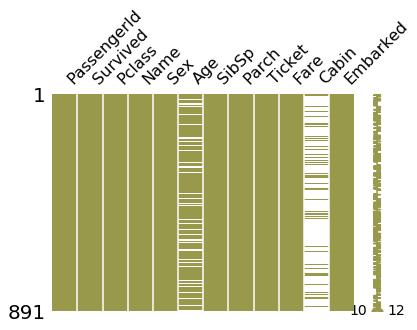

In [100]:
msno.matrix(df = train.iloc[:,:], figsize = (6,4),color = (0.6,0.6,0.3))

In [0]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked='True', figsize=(10,5))

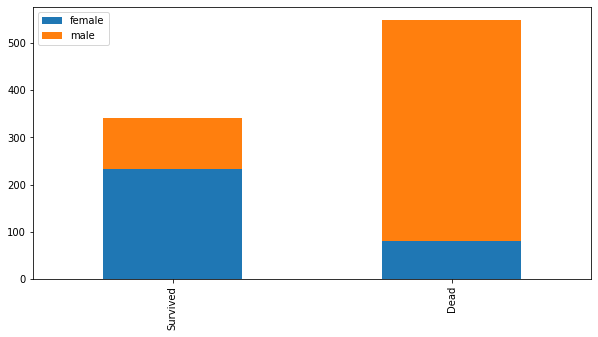

In [102]:
bar_chart('Sex')

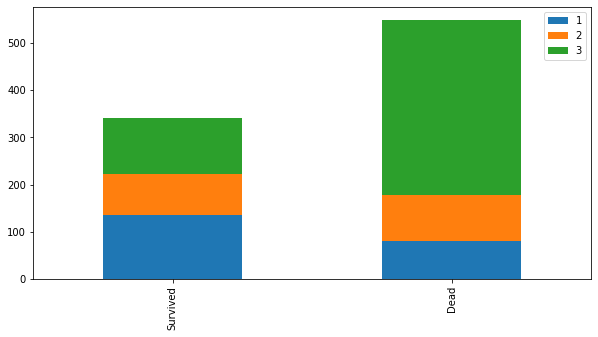

In [103]:
bar_chart('Pclass')

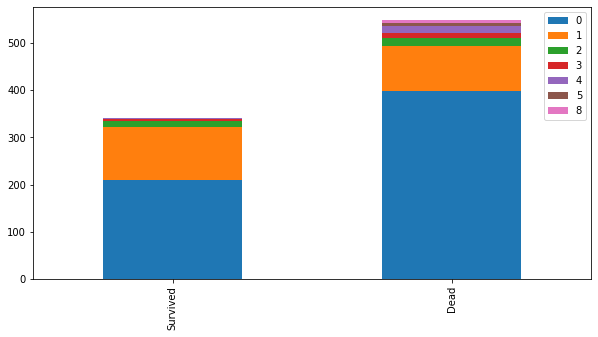

In [104]:
bar_chart('SibSp')

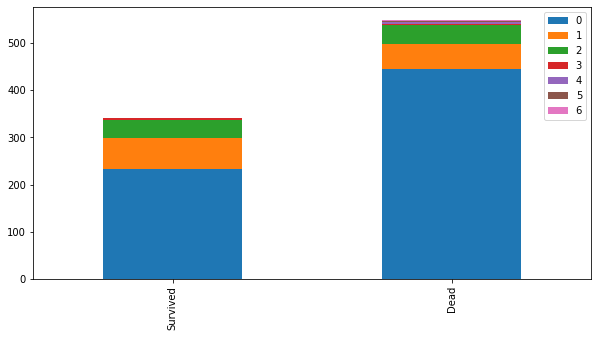

In [105]:
bar_chart('Parch')

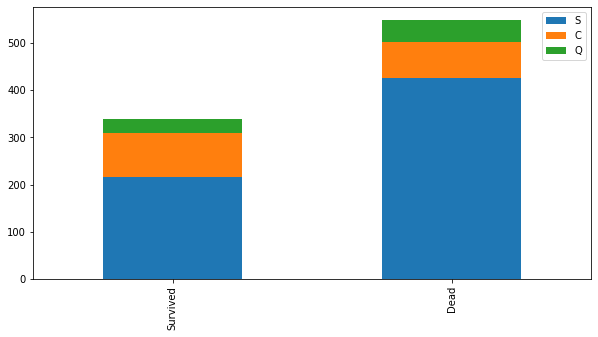

In [106]:
bar_chart('Embarked')

In [0]:
################## 데이터 가공 Feature Engineering ####################
## Carbin과 Ticket 두 값은 삭제한다. (값이 비어잇고 연관성이 없다는 판단하에)
train = train.drop(['Cabin'], axis =1)
test = test.drop(['Cabin'], axis =1)
train = train.drop(['Ticket'], axis =1)
test = test.drop(['Ticket'], axis =1)

In [108]:
test.head()
#test.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [109]:
## Embarked 값 가공
southamphton = train[train["Embarked"] == "S"].shape[0]
print("S : ", southamphton)
queenstown = train[train["Embarked"] == "Q"].shape[0]
print("Q : ", queenstown)
cherbourg = train[train["Embarked"] == "C"].shape[0]
print("C : ", cherbourg)

S :  644
Q :  77
C :  168


In [0]:
#비어있는 Embarked값은 "S"로
train = train.fillna({"Embarked" : "S"})
#각 값을 숫자로 변경
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

In [111]:
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [0]:
## Name값 가공하기
combine = [train, test]

In [113]:
for data in combine : 
  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [114]:
for data in combine:
  data['Title'] = data['Title'].replace(['Lady','Capt','Col','Countess','Don','Dr','Jonkheer','Major',
                                            'Mlle','Mle','Mme','Rev','Sir'], 'Rare')
  data['Title'] = data['Title'].replace('Ms', 'Miss')
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.423077


In [115]:
title_mapping = {"Mr": 1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for data in combine:
  data['Title'] = data['Title'].map(title_mapping)
  data['Title'] = data['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [116]:
#Name과 PID 삭제
train = train.drop(['Name', 'PassengerId'], axis= 1)
test = test.drop(['Name'], axis =1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [117]:
sex_mapping = {"male": 0, "female": 1}
for data in combine:
  data['Sex'] = data['Sex'].map(sex_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [118]:
#Age값 가공하기
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels =['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
#pd.cut is useful going from continous variable to categorical variable
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


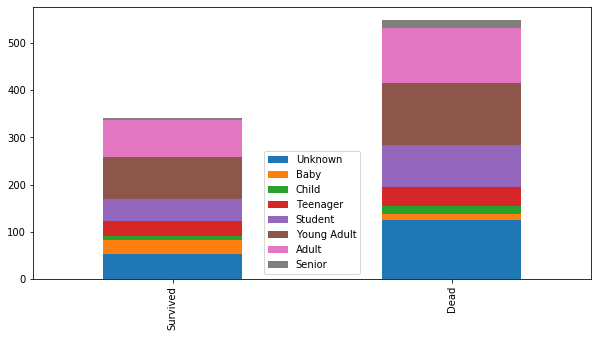

In [119]:
bar_chart('AgeGroup')

In [120]:
#????????????????????????????????????????????
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby",
                     5: "Adult", 6: "Senior"}
for i in range(len(train["AgeGroup"])):
  if train["AgeGroup"][i] == 'Unknown':
    train["AgeGroup"][i] = age_title_mapping[train["Title"][i]]

for i in range(len(test["AgeGroup"])):
  if test["AgeGroup"][i] == 'Unknown':
    test["AgeGroup"][i] = age_title_mapping[test["Title"][i]]

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [121]:
age_mapping = {"Baby": 1, "Child": 2, "Teenager": 3, "Student": 4, "Young Adult":5,
               "Adult":5, "Senior":6}
train["AgeGroup"] = train["AgeGroup"].map(age_mapping)
test["AgeGroup"] = test["AgeGroup"].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4.0
1,1,1,1,1,0,71.2833,2,3,5.0
2,1,3,1,0,0,7.9250,1,2,5.0
3,1,1,1,1,0,53.1000,1,3,5.0
4,0,3,0,0,0,8.0500,1,1,5.0


In [123]:
train['FareBand']= pd.qcut(train['Fare'], 4, labels = [1,2,3,4])
test['FareBand']= pd.qcut(test['Fare'], 4, labels = [1,2,3,4])

train = train.drop(['Fare'], axis =1)
test = test.drop(['Fare'], axis =1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4.0,1
1,1,1,1,1,0,2,3,5.0,4
2,1,3,1,0,0,1,2,5.0,2
3,1,1,1,1,0,1,3,5.0,4
4,0,3,0,0,0,1,1,5.0,2


In [0]:
FB_1 = test[test['FareBand']==1].shape[0]
FB_2 = test[test['FareBand']==2].shape[0]
FB_3 = test[test['FareBand']==3].shape[0]
FB_4 = test[test['FareBand']==4].shape[0]
FB_1, FB_2, FB_3, FB_4
test['FareBand'] = test['FareBand'].fillna(1)

In [146]:
############## Data Modeling ####################
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [157]:
train_data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null float64
FareBand    891 non-null category
dtypes: category(1), float64(1), int64(6)
memory usage: 49.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
Title          418 non-null float64
AgeGroup       418 non-null float64
FareBand       418 non-null category
dtypes: category(1), float64(2), int64(6)
memory usage: 26.8 KB


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits =10, shuffle = True, random_state = 0)

In [151]:
clf = RandomForestClassifier(n_estimators =13) # 13개의 decision tree 사용
clf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
clf.score(train_data, target)

0.8900112233445566

In [153]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.85393258 0.76404494 0.82022472 0.84269663 0.80898876
 0.85393258 0.80898876 0.78651685 0.80898876]


In [154]:
#decision tree score
round(np.mean(score)*100,2 )

81.48

In [0]:
test_data = test.drop(['PassengerId'], axis =1)
prediction = clf.predict(test_data)

In [171]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv('submission.csv', index = False)

FileNotFoundError: ignored

In [163]:
submission = pd.read_csv('submission.csv')
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [170]:
!kaggle competitions submit Titanic -f submission.csv -m "first submit, my file through the Goggle Colab!"

100% 2.77k/2.77k [00:02<00:00, 1.25kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster